# Dissertation CNN

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import shutil
from glob import glob
import random
from tqdm.notebook import tqdm
from PIL import Image
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers, Model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from keras.layers import Activation, Conv2DTranspose, concatenate, Input, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

#### 5 random true model images

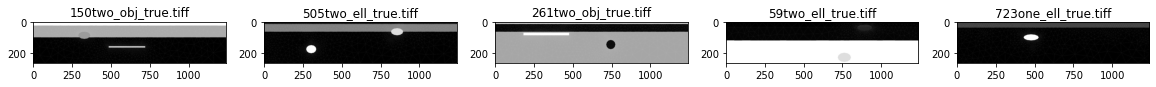

In [32]:
plt.figure(figsize=(20,20))

test_folder = r'/home/gonde94/Documents/Diss_Dataset/target/train'

for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder, file)
    img = imread(image_path)
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(file)
    plt.imshow(img)

### Rename files in Synthetic Dataset - App_Res

In [24]:
path = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Ell'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), 'one_ell_app_res.tiff'])))
    
path2 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Rec'
files2 = os.listdir(path2)

for index, file in enumerate(files2):
    os.rename(os.path.join(path2, file), os.path.join(path2, ''.join([str(index), 'one_rec_app_res.tiff'])))
    
path3 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Ell'
files3 = os.listdir(path3)

for index, file in enumerate(files3):
    os.rename(os.path.join(path3, file), os.path.join(path3, ''.join([str(index), 'two_ell_app_res.tiff'])))
    
path4 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Rec'
files4 = os.listdir(path4)

for index, file in enumerate(files4):
    os.rename(os.path.join(path4, file), os.path.join(path4, ''.join([str(index), 'two_rec_app_res.tiff'])))
    
path5 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Obj'
files5 = os.listdir(path5)

for index, file in enumerate(files5):
    os.rename(os.path.join(path5, file), os.path.join(path5, ''.join([str(index), 'two_obj_app_res.tiff'])))
    
path6 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Ell'
files6 = os.listdir(path6)

for index, file in enumerate(files6):
    os.rename(os.path.join(path6, file), os.path.join(path6, ''.join([str(index), 'three_ell_app_res.tiff'])))
    
path7 = '/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Rec'
files7 = os.listdir(path7)

for index, file in enumerate(files7):
    os.rename(os.path.join(path7, file), os.path.join(path7, ''.join([str(index), 'three_rec_app_res.tiff'])))

### Rename files in Synthetic Dataset - True_Model

In [25]:
path = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Ell'
files = os.listdir(path)

for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), 'one_ell_true.tiff'])))
    
path2 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Rec'
files2 = os.listdir(path2)

for index, file in enumerate(files2):
    os.rename(os.path.join(path2, file), os.path.join(path2, ''.join([str(index), 'one_rec_true.tiff'])))
    
path3 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Ell'
files3 = os.listdir(path3)

for index, file in enumerate(files3):
    os.rename(os.path.join(path3, file), os.path.join(path3, ''.join([str(index), 'two_ell_true.tiff'])))
    
path4 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Rec'
files4 = os.listdir(path4)

for index, file in enumerate(files4):
    os.rename(os.path.join(path4, file), os.path.join(path4, ''.join([str(index), 'two_rec_true.tiff'])))
    
path5 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Obj'
files5 = os.listdir(path5)

for index, file in enumerate(files5):
    os.rename(os.path.join(path5, file), os.path.join(path5, ''.join([str(index), 'two_obj_true.tiff'])))
    
path6 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Ell'
files6 = os.listdir(path6)

for index, file in enumerate(files6):
    os.rename(os.path.join(path6, file), os.path.join(path6, ''.join([str(index), 'three_ell_true.tiff'])))
    
path7 = '/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Rec'
files7 = os.listdir(path7)

for index, file in enumerate(files7):
    os.rename(os.path.join(path7, file), os.path.join(path7, ''.join([str(index), 'three_rec_true.tiff'])))

### Copying images to training, validation, and test directories

In [50]:
#Create directory for organised dataset
base_dir = "/home/gonde94/Documents/Diss_Dataset"
os.mkdir(base_dir) 

#Directors for input and target
input_dir = os.path.join(base_dir, 'input')
os.mkdir(input_dir)
target_dir = os.path.join(base_dir, 'target')
os.mkdir(target_dir)

#Directories for training, validation and test splits in input directory
train_dir_input = os.path.join(input_dir, 'train')
os.mkdir(train_dir_input)
validation_dir_input = os.path.join(input_dir, 'validation')
os.mkdir(validation_dir_input)
test_dir_input = os.path.join(input_dir, 'test')
os.mkdir(test_dir_input)

#Directories for training, validation and test splits in target directory
train_dir_target = os.path.join(target_dir, 'train')
os.mkdir(train_dir_target)
validation_dir_target = os.path.join(target_dir, 'validation')
os.mkdir(validation_dir_target)
test_dir_target = os.path.join(target_dir, 'test')
os.mkdir(test_dir_target)

#Copy first 1400 one_ellipse images into train_dir_input
src_dir = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Ell"
dst_dir = train_dir_input

fnames = ['{}one_ell_app_res.tiff'.format(i) for i in range(1400)]
for fname in fnames:
    src = os.path.join(src_dir, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
src_dir2 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Rec"
    
fnames = ['{}one_rec_app_res.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(src_dir2, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
src_dir3 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Ell"
    
fnames = ['{}three_ell_app_res.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(src_dir3, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
src_dir4 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Rec"
    
fnames = ['{}three_rec_app_res.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(src_dir4, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
src_dir5 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Ell"
    
fnames = ['{}two_ell_app_res.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(src_dir5, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
src_dir6 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Obj"
    
fnames = ['{}two_obj_app_res.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(src_dir6, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)
    
src_dir7 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Rec"

fnames = ['{}two_rec_app_res.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(src_dir7, fname)
    dst = os.path.join(dst_dir, fname)
    shutil.copyfile(src, dst)

In [51]:
#Copy next 50-100 images to validation directory
dst_dir2 = validation_dir_input

fnames = ['{}one_ell_app_res.tiff'.format(i) for i in range(1400, 1500)]
for fname in fnames:
    src = os.path.join(src_dir, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
src_dir2 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Rec"
    
fnames = ['{}one_rec_app_res.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(src_dir2, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
src_dir3 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Ell"
    
fnames = ['{}three_ell_app_res.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(src_dir3, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
src_dir4 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Rec"
    
fnames = ['{}three_rec_app_res.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(src_dir4, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
src_dir5 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Ell"
    
fnames = ['{}two_ell_app_res.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(src_dir5, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
src_dir6 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Obj"
    
fnames = ['{}two_obj_app_res.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(src_dir6, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)
    
src_dir7 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Rec"

fnames = ['{}two_rec_app_res.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(src_dir7, fname)
    dst = os.path.join(dst_dir2, fname)
    shutil.copyfile(src, dst)

In [52]:
#And the same for the test directory
dst_dir3 = test_dir_input

fnames = ['{}one_ell_app_res.tiff'.format(i) for i in range(1500, 1600)]
for fname in fnames:
    src = os.path.join(src_dir, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
src_dir2 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_One_Rec"
    
fnames = ['{}one_rec_app_res.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(src_dir2, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
src_dir3 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Ell"
    
fnames = ['{}three_ell_app_res.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(src_dir3, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
src_dir4 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Three_Rec"
    
fnames = ['{}three_rec_app_res.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(src_dir4, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
src_dir5 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Ell"
    
fnames = ['{}two_ell_app_res.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(src_dir5, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
src_dir6 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Obj"
    
fnames = ['{}two_obj_app_res.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(src_dir6, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)
    
src_dir7 = "/home/gonde94/Documents/Synthetic_Data/App_Res/App_Res_Two_Rec"

fnames = ['{}two_rec_app_res.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(src_dir7, fname)
    dst = os.path.join(dst_dir3, fname)
    shutil.copyfile(src, dst)

In [54]:
#Now training for target directory
tar_dir = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Ell"
dat_dir = train_dir_target

fnames = ['{}one_ell_true.tiff'.format(i) for i in range(1400)]
for fname in fnames:
    src = os.path.join(tar_dir, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
tar_dir2 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Rec"
    
fnames = ['{}one_rec_true.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(tar_dir2, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
tar_dir3 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Ell"
    
fnames = ['{}three_ell_true.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(tar_dir3, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
tar_dir4 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Rec"
    
fnames = ['{}three_rec_true.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(tar_dir4, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
tar_dir5 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Ell"
    
fnames = ['{}two_ell_true.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(tar_dir5, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
tar_dir6 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Obj"
    
fnames = ['{}two_obj_true.tiff'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(tar_dir6, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)
    
tar_dir7 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Rec"

fnames = ['{}two_rec_true.tiff'.format(i) for i in range(400)]
for fname in fnames:
    src = os.path.join(tar_dir7, fname)
    dst = os.path.join(dat_dir, fname)
    shutil.copyfile(src, dst)

In [55]:
#Copy next 50-100 images to validation directory
dat_dir2 = validation_dir_target

fnames = ['{}one_ell_true.tiff'.format(i) for i in range(1400, 1500)]
for fname in fnames:
    src = os.path.join(tar_dir, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
tar_dir2 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Rec"
    
fnames = ['{}one_rec_true.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(tar_dir2, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
tar_dir3 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Ell"
    
fnames = ['{}three_ell_true.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(tar_dir3, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
tar_dir4 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Rec"
    
fnames = ['{}three_rec_true.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(tar_dir4, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
tar_dir5 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Ell"
    
fnames = ['{}two_ell_true.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(tar_dir5, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
tar_dir6 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Obj"
    
fnames = ['{}two_obj_true.tiff'.format(i) for i in range(500, 550)]
for fname in fnames:
    src = os.path.join(tar_dir6, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)
    
tar_dir7 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Rec"

fnames = ['{}two_rec_true.tiff'.format(i) for i in range(400, 450)]
for fname in fnames:
    src = os.path.join(tar_dir7, fname)
    dst = os.path.join(dat_dir2, fname)
    shutil.copyfile(src, dst)

In [56]:
#And the same for the test directory
dat_dir3 = test_dir_target

fnames = ['{}one_ell_true.tiff'.format(i) for i in range(1500, 1600)]
for fname in fnames:
    src = os.path.join(tar_dir, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
#Do the same for the other directories 
tar_dir2 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_One_Rec"
    
fnames = ['{}one_rec_true.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(tar_dir2, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
tar_dir3 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Ell"
    
fnames = ['{}three_ell_true.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(tar_dir3, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
tar_dir4 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Three_Rec"
    
fnames = ['{}three_rec_true.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(tar_dir4, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
tar_dir5 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Ell"
    
fnames = ['{}two_ell_true.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(tar_dir5, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
tar_dir6 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Obj"
    
fnames = ['{}two_obj_true.tiff'.format(i) for i in range(550, 600)]
for fname in fnames:
    src = os.path.join(tar_dir6, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)
    
tar_dir7 = "/home/gonde94/Documents/Synthetic_Data/True_Model/True_Model_Two_Rec"

fnames = ['{}two_rec_true.tiff'.format(i) for i in range(450, 500)]
for fname in fnames:
    src = os.path.join(tar_dir7, fname)
    dst = os.path.join(dat_dir3, fname)
    shutil.copyfile(src, dst)

#### Confirm the length of each split

In [57]:
dirr = "/home/gonde94/Documents/Diss_Dataset/"

print('Total input train images: ', len(os.l#istdir(dirr+"input/train")))
print('Total input validation images: ', len(os.listdir(dirr+"input/validation")))
print('Total input test images: ', len(os.listdir(dirr+"input/test")))
print('Total target train images: ', len(os.listdir(dirr+"target/train")))
print('Total target validation images: ', len(os.listdir(dirr+"target/validation")))
print('Total target test images: ', len(os.listdir(dirr+"target/test")))

Total input train images:  4100
Total input validation images:  400
Total input test images:  400
Total target train images:  4100
Total target validation images:  400
Total target test images:  400


### Prepare paths of input images and target segmentation masks

In [6]:
input_dir = "/home/gonde94/Documents/Diss_Dataset/input/train"
target_dir = "/home/gonde94/Documents/Diss_Dataset/target/train"
img_size = (160, 160)
batch_size = 16

input_img_paths = sorted([os.path.join(input_dir, fname)
                         for fname in os.listdir(input_dir)])

target_img_paths = sorted([os.path.join(target_dir, fname)
                          for fname in os.listdir(target_dir)])

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 4100
/home/gonde94/Documents/Diss_Dataset/input/train/0one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0one_rec_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0one_rec_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0three_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0three_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0three_rec_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0three_rec_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0two_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0two_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0two_obj_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/train/0two_obj_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/train/0two_rec_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target

#### What does one input image and corresponding target look like?

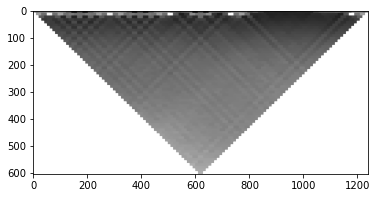

In [61]:
img = imread(input_img_paths[1000])
plt.imshow(img)

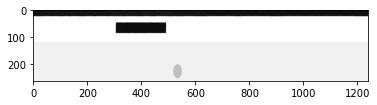

In [62]:
tar = imread(target_img_paths[1000])
plt.imshow(tar)

#### How many channels in image?

In [44]:
img = Image.open(input_img_paths[0])
img = np.array(img)

#Find number of channels
if img.ndim == 2:
    channels = 1
    print("Image has 1 channel")
else:
    channels = img.shape[-1]
    print("Image has ", channels, "channels")

Image has  4 channels


### Load the inputs and targets into arrays

In [28]:
path = "/home/gonde94/Documents/Diss_Dataset/"

im_width = 128
im_height = 128

In [33]:
train_ids = next(os.walk(path+"input/train"))[2]
tar_ids = next(os.walk(path+"target/train"))[2]

In [50]:
X = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.float32)

In [51]:
print(X.shape)
print(y.shape)

(4100, 128, 128, 1)
(4100, 128, 128, 1)


In [52]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    #Load images
    path = path
    img = load_img(path + "input/train/" + id_)
    x_img = img_to_array(img)[:,:,1]
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    X[n] = x_img/255.0
    
for n, id_ in tqdm(enumerate(tar_ids), total=len(tar_ids)):
    #Load targets
    mask = img_to_array(load_img(path + "target/train/" + id_))[:,:,1]
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    y[n] = mask/255.0

  0%|          | 0/4100 [00:00<?, ?it/s]

  0%|          | 0/4100 [00:00<?, ?it/s]

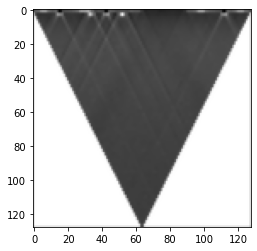

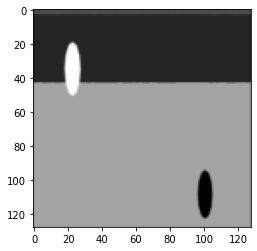

In [53]:
#Check if training data looks okay

ix = 1000
plt.imshow(np.dstack((X[ix], X[ix], X[ix])))
plt.show()

tmp = np.squeeze(y[ix]).astype(np.float32)
plt.imshow(np.dstack((tmp, tmp, tmp)))
plt.show()

In [55]:
X[1000]

array([[[0.28334722],
        [0.33115667],
        [0.36207166],
        ...,
        [0.36441645],
        [0.32837176],
        [0.28030223]],

       [[0.34439075],
        [0.36623013],
        [0.39117977],
        ...,
        [0.3940973 ],
        [0.36373124],
        [0.34126252]],

       [[0.6938477 ],
        [0.3268807 ],
        [0.2340893 ],
        ...,
        [0.24073368],
        [0.33188495],
        [0.6940357 ]],

       ...,

       [[0.8667242 ],
        [0.99962366],
        [1.        ],
        ...,
        [1.        ],
        [0.99962366],
        [0.8667242 ]],

       [[0.8666585 ],
        [0.999548  ],
        [0.9999243 ],
        ...,
        [0.9999243 ],
        [0.99954796],
        [0.86665857]],

       [[0.77689344],
        [0.8960187 ],
        [0.89635605],
        ...,
        [0.89635605],
        [0.8960187 ],
        [0.7768934 ]]], dtype=float32)

In [56]:
X[1000].shape

(128, 128, 1)

In [57]:
y[1000]

array([[[0.24659629],
        [0.28440824],
        [0.2845153 ],
        ...,
        [0.2845153 ],
        [0.28440824],
        [0.24659629]],

       [[0.2617164 ],
        [0.3018471 ],
        [0.3019608 ],
        ...,
        [0.3019608 ],
        [0.30184716],
        [0.26171672]],

       [[0.2555656 ],
        [0.295319  ],
        [0.2949355 ],
        ...,
        [0.29586616],
        [0.29493788],
        [0.25533706]],

       ...,

       [[0.5574226 ],
        [0.6428952 ],
        [0.6431373 ],
        ...,
        [0.6431373 ],
        [0.6428953 ],
        [0.5574226 ]],

       [[0.5574226 ],
        [0.6428952 ],
        [0.6431373 ],
        ...,
        [0.6431373 ],
        [0.6428953 ],
        [0.5574226 ]],

       [[0.52521807],
        [0.6057526 ],
        [0.60598063],
        ...,
        [0.60598063],
        [0.6057526 ],
        [0.52521807]]], dtype=float32)

In [58]:
y[1000].shape

(128, 128, 1)

## Define metric

In [182]:
#def mean_iou(y_true, y_pred):
#    prec = []
#    for t in np.arange(0.5, 1.0, 0.05):
#        y_pred_ = tf.cast((y_pred > t), tf.int32)
#        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
#        K.get_session().run(tf.local_variables_initializer())
#        with tf.control_dependencies([up_opt]):
#            score = tf.identity(score)
#        prec.append(score)
#    return K.mean(K.stack(prec), axis=0)

def IoU(y_pred, y_true):
    I = tf.reduce_sum(y_pred * y_true, axis=(1,2))
    U = tf.reduce_sum(y_pred + y_true, axis=(1,2)) - I
    return tf.reduce_mean(I / U)

### Get validation data

In [83]:
val_input_dir = "/home/gonde94/Documents/Diss_Dataset/input/validation"
val_target_dir = "/home/gonde94/Documents/Diss_Dataset/target/validation"

val_input_img_paths = sorted([os.path.join(val_input_dir, fname)
                         for fname in os.listdir(val_input_dir)])

val_target_img_paths = sorted([os.path.join(val_target_dir, fname)
                          for fname in os.listdir(val_target_dir)])

print("Number of samples:", len(val_input_img_paths))

for input_path, target_path in zip(val_input_img_paths[:10], val_target_img_paths[:10]):
    print(input_path, "|", target_path)

Number of samples: 400
/home/gonde94/Documents/Diss_Dataset/input/validation/1400one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1400one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/validation/1401one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1401one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/validation/1402one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1402one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/validation/1403one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1403one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/validation/1404one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1404one_ell_true.tiff
/home/gonde94/Documents/Diss_Dataset/input/validation/1405one_ell_app_res.tiff | /home/gonde94/Documents/Diss_Dataset/target/validation/1405one_ell_true.tiff
/home/gonde94/Documents/Diss_

In [85]:
val_train_ids = next(os.walk(path+"input/validation"))[2]
val_tar_ids = next(os.walk(path+"target/validation"))[2]

In [86]:
X1 = np.zeros((len(val_input_img_paths), im_height, im_width, 1), dtype=np.float32)
y1 = np.zeros((len(val_target_img_paths), im_height, im_width, 1), dtype=np.float32)

In [87]:
for n, id_ in tqdm(enumerate(val_train_ids), total=len(val_train_ids)):
    #Load images
    path = path
    img = load_img(path + "input/validation/" + id_)
    x_img = img_to_array(img)[:,:,1]
    x_img = resize(x_img, (128, 128, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    X1[n] = x_img/255.0
    
for n, id_ in tqdm(enumerate(val_tar_ids), total=len(val_tar_ids)):
    #Load targets
    mask = img_to_array(load_img(path + "target/validation/" + id_))[:,:,1]
    mask = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)
    
    #Normalise images
    y1[n] = mask/255.0

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

## Semantic Segmentation with UNET

In [178]:
def build_model(input_layer, start_neurons):
    # 128 -> 64
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    # 64 -> 32
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    # 32 -> 16
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    # 16 -> 8
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

    # 8 -> 16
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    # 16 -> 32
    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    # 32 -> 64
    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    # 64 -> 128
    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    #uconv1 = Dropout(0.5)(uconv1)
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

input_layer = Input((128, 128, 1))
output_layer = build_model(input_layer, 16)

In [183]:
model = Model(input_layer, output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[IoU])

In [184]:
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_76 (Conv2D)             (None, 128, 128, 16  160         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 128, 128, 16  2320        ['conv2d_76[0][0]']              
                                )                                                          

### Train the model

In [185]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model_checkpoint = ModelCheckpoint("FindObjectsMeanIou.h5", save_best_only=True, verbose=1)

epochs = 15
batch_size = 32

history = model.fit(X, y, validation_data=[X1, y1], epochs=epochs, batch_size=batch_size,
                   callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
129/129 [==============================] - ETA: 0s - loss: 0.6932 - IoU: 0.3076
Epoch 00001: val_loss improved from inf to 0.69315, saving model to FindObjectsMeanIou.h5
129/129 [==============================] - 512s 4s/step - loss: 0.6932 - IoU: 0.3076 - val_loss: 0.6932 - val_IoU: 0.3121
Epoch 2/15
129/129 [==============================] - ETA: 0s - loss: 0.6930 - IoU: 0.3067
Epoch 00002: val_loss improved from 0.69315 to 0.69311, saving model to FindObjectsMeanIou.h5
129/129 [==============================] - 499s 4s/step - loss: 0.6930 - IoU: 0.3067 - val_loss: 0.6931 - val_IoU: 0.3122
Epoch 3/15
129/129 [==============================] - ETA: 0s - loss: 0.6930 - IoU: 0.3061
Epoch 00003: val_loss improved from 0.69311 to 0.69310, saving model to FindObjectsMeanIou.h5
129/129 [==============================] - 521s 4s/step - loss: 0.6930 - IoU: 0.3061 - val_loss: 0.6931 - val_IoU: 0.3120
Epoch 4/15
129/129 [==============================] - ETA: 0s - loss: 0.6930 - IoU:

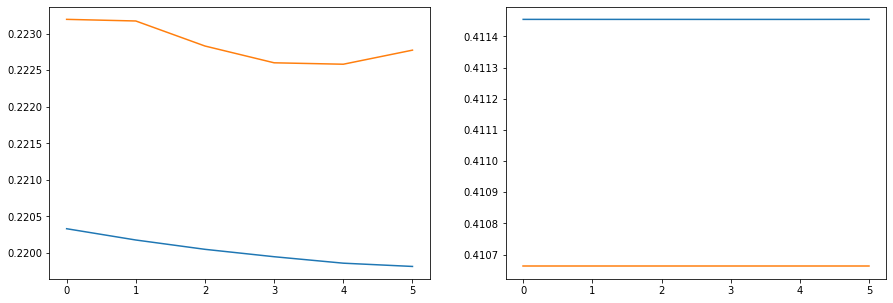

In [116]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")

#### Predict the validation set to do a sanity check

In [197]:
model = load_model("/home/gonde94/FindObjectsMeanIou.h5", custom_objects={"IoU": IoU})

In [198]:
preds_train = model.predict(X, verbose=1)
preds_valid = model.predict(X1, verbose=1)

13/13 [==============================] - 11s 828ms/step


In [199]:
#Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_valid_t = (preds_valid > 0.5).astype(np.uint8)

In [200]:
def plot_sample(X, y, preds, ix=None):
    """Function to plot the results"""
    ix = random.randint(0, len(X))
    
    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix,...,0])
    ax[0].set_title('Apparent Resistivity')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('True Model')

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted model')

### Predictions on training set

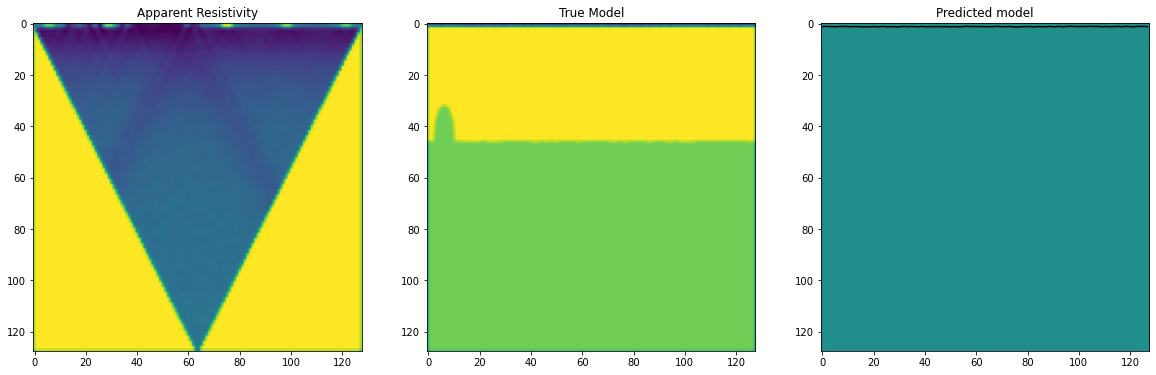

In [201]:
plot_sample(X, y, preds_train)

### Predictions on validation set

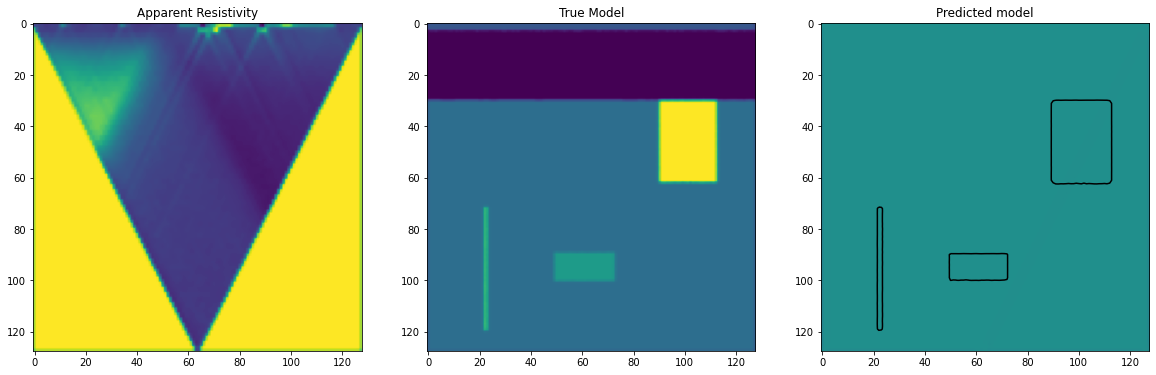

In [202]:
plot_sample(X1, y1, preds_valid)